In [1]:
#Reading Data For Analysis

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import os

In [4]:
os.listdir(r"E:\Data Analysis and Visualization\Uber Data Analysis\Datasets")

['other-American_B01362.csv',
 'other-Carmel_B00256.csv',
 'other-Dial7_B00887.csv',
 'other-Diplo_B01196.csv',
 'other-Federal_02216.csv',
 'other-FHV-services_jan-aug-2015.csv',
 'other-Firstclass_B01536.csv',
 'other-Highclass_B01717.csv',
 'other-Lyft_B02510.csv',
 'other-Prestige_B01338.csv',
 'other-Skyline_B00111.csv',
 'Uber-Jan-Feb-FOIL.csv',
 'uber-raw-data-apr14.csv',
 'uber-raw-data-aug14.csv',
 'uber-raw-data-janjune-15.csv',
 'uber-raw-data-janjune-15_sample.csv',
 'uber-raw-data-jul14.csv',
 'uber-raw-data-jun14.csv',
 'uber-raw-data-may14.csv',
 'uber-raw-data-sep14.csv']

In [5]:
uber_15 = pd.read_csv(r"E:\Data Analysis and Visualization\Uber Data Analysis\Datasets\uber-raw-data-janjune-15_sample.csv")

In [6]:
uber_15.shape


(100000, 4)

In [7]:
#Data Preprocessing/Data Cleaning

In [8]:
type(uber_15)

pandas.core.frame.DataFrame

In [9]:
#uber_15.duplicated()
uber_15.duplicated().sum()

54

In [10]:
uber_15.drop_duplicates(inplace=True) #removing duplicate data 

In [11]:
uber_15.duplicated().sum()

0

In [12]:
uber_15.shape #duplacte data has been dropped

(99946, 4)

In [13]:
uber_15.dtypes #object --> strings

Dispatching_base_num    object
Pickup_date             object
Affiliated_base_num     object
locationID               int64
dtype: object

In [14]:
uber_15.isnull().sum()

Dispatching_base_num       0
Pickup_date                0
Affiliated_base_num     1116
locationID                 0
dtype: int64

In [15]:
uber_15['Pickup_date'][0]

'2015-05-02 21:43:00'

In [16]:
type(uber_15['Pickup_date'][0])

str

In [17]:
uber_15['Pickup_date'] = pd.to_datetime(uber_15['Pickup_date'])

In [18]:
uber_15['Pickup_date'].dtype

dtype('<M8[ns]')

In [19]:
uber_15['Pickup_date'][0]

Timestamp('2015-05-02 21:43:00')

In [20]:
type(uber_15['Pickup_date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [21]:
uber_15.dtypes

Dispatching_base_num            object
Pickup_date             datetime64[ns]
Affiliated_base_num             object
locationID                       int64
dtype: object

In [22]:
#Which month have max. Uber Pickups in New York City?

In [23]:
uber_15

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID
0,B02617,2015-05-02 21:43:00,B02764,237
1,B02682,2015-01-20 19:52:59,B02682,231
2,B02617,2015-03-19 20:26:00,B02617,161
3,B02764,2015-04-10 17:38:00,B02764,107
4,B02764,2015-03-23 07:03:00,B00111,140
...,...,...,...,...
99995,B02764,2015-04-13 16:12:00,B02764,234
99996,B02764,2015-03-06 21:32:00,B02764,24
99997,B02598,2015-03-19 19:56:00,B02598,17
99998,B02682,2015-05-02 16:02:00,B02682,68


In [24]:
uber_15['month'] = uber_15['Pickup_date'].dt.month_name()

In [25]:
uber_15['month']

0            May
1        January
2          March
3          April
4          March
          ...   
99995      April
99996      March
99997      March
99998        May
99999       June
Name: month, Length: 99946, dtype: object

<AxesSubplot: >

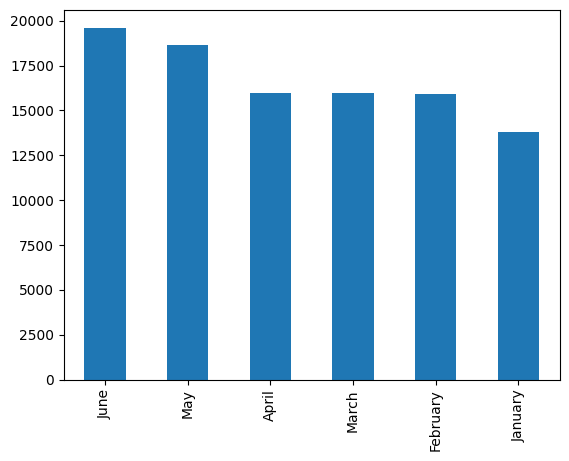

In [26]:
uber_15['month'].value_counts().plot(kind='bar')

In [27]:
#June seems to have max Uber Pickups

In [28]:
#extracting derived features (weekday, day, hour, month, minute) from pickup date

In [29]:
uber_15['weekday'] = uber_15['Pickup_date'].dt.day_name()
uber_15['day'] = uber_15['Pickup_date'].dt.day
uber_15['hour'] = uber_15['Pickup_date'].dt.hour
uber_15['minute'] = uber_15['Pickup_date'].dt.minute

In [30]:
uber_15.head(4)

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID,month,weekday,day,hour,minute
0,B02617,2015-05-02 21:43:00,B02764,237,May,Saturday,2,21,43
1,B02682,2015-01-20 19:52:59,B02682,231,January,Tuesday,20,19,52
2,B02617,2015-03-19 20:26:00,B02617,161,March,Thursday,19,20,26
3,B02764,2015-04-10 17:38:00,B02764,107,April,Friday,10,17,38


In [31]:
# pd.crosstab() is used to create pivot table 

In [32]:
pivot = pd.crosstab(index=uber_15['month'], columns=uber_15['weekday'])

In [33]:
pivot

weekday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
month,,,,,,,
April,2365,1833,2508,2052,2823,1880,2521
February,2655,1970,2550,2183,2396,2129,2013
January,2508,1353,2745,1651,2378,1444,1740
June,2793,2848,3037,2485,2767,3187,2503
March,2465,2115,2522,2379,2093,2388,2007
May,3262,1865,3519,2944,2627,2115,2328


<AxesSubplot: xlabel='month'>

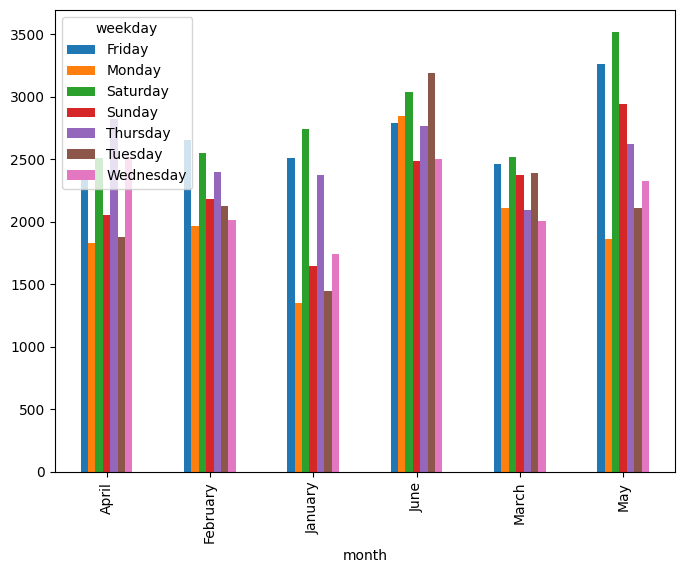

In [34]:
#grouped-bar plot using Pandas
pivot.plot(kind='bar', figsize=(8,6))

In [35]:
# On saturday and friday, they are getting more Uber pickups in each months


In [36]:
# Find out hourly rush in New York City on all days

In [37]:
summary = uber_15.groupby(['weekday','hour'], as_index=False).size()

In [38]:
summary

,weekday,hour,size
0,Friday,0,581
1,Friday,1,333
2,Friday,2,197
3,Friday,3,138
4,Friday,4,161
...,...,...,...
163,Wednesday,19,1044
164,Wednesday,20,897
165,Wednesday,21,949
166,Wednesday,22,900


In [39]:
#point plot between 'hour' & 'size' for all the weekdays

<AxesSubplot: xlabel='hour', ylabel='size'>

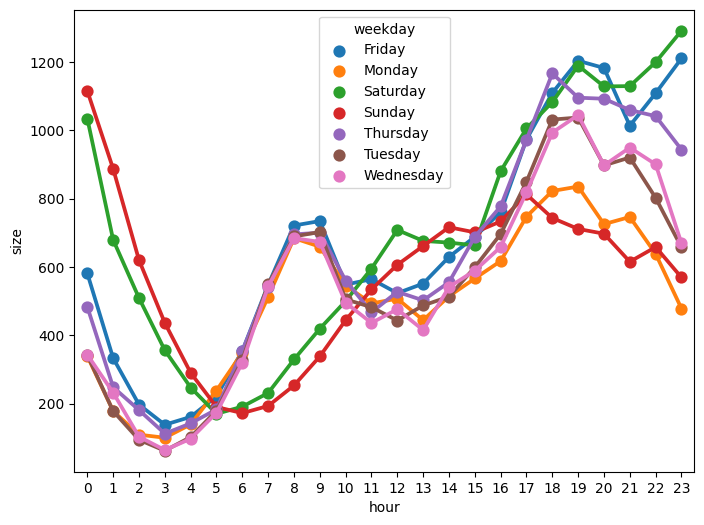

In [40]:
plt.figure(figsize=(8,6))
sns.pointplot(x='hour', y='size', hue='weekday', data=summary)

In [41]:
#which base_number has most number of active vehicles?

In [42]:
uber_15.columns

Index(['Dispatching_base_num', 'Pickup_date', 'Affiliated_base_num',
       'locationID', 'month', 'weekday', 'day', 'hour', 'minute'],
      dtype='object')

In [43]:
os.listdir(r"E:\Data Analysis and Visualization\Uber Data Analysis\Datasets")

['other-American_B01362.csv',
 'other-Carmel_B00256.csv',
 'other-Dial7_B00887.csv',
 'other-Diplo_B01196.csv',
 'other-Federal_02216.csv',
 'other-FHV-services_jan-aug-2015.csv',
 'other-Firstclass_B01536.csv',
 'other-Highclass_B01717.csv',
 'other-Lyft_B02510.csv',
 'other-Prestige_B01338.csv',
 'other-Skyline_B00111.csv',
 'Uber-Jan-Feb-FOIL.csv',
 'uber-raw-data-apr14.csv',
 'uber-raw-data-aug14.csv',
 'uber-raw-data-janjune-15.csv',
 'uber-raw-data-janjune-15_sample.csv',
 'uber-raw-data-jul14.csv',
 'uber-raw-data-jun14.csv',
 'uber-raw-data-may14.csv',
 'uber-raw-data-sep14.csv']

In [47]:
uber_foil = pd.read_csv(r"E:\Data Analysis and Visualization\Uber Data Analysis\Datasets\Uber-Jan-Feb-FOIL.csv")

In [48]:
uber_foil

,dispatching_base_number,date,active_vehicles,trips
0,B02512,1/1/2015,190,1132
1,B02765,1/1/2015,225,1765
2,B02764,1/1/2015,3427,29421
3,B02682,1/1/2015,945,7679
4,B02617,1/1/2015,1228,9537
...,...,...,...,...
349,B02764,2/28/2015,3952,39812
350,B02617,2/28/2015,1372,14022
351,B02682,2/28/2015,1386,14472
352,B02512,2/28/2015,230,1803


In [49]:
uber_foil.head(3)

,dispatching_base_number,date,active_vehicles,trips
0,B02512,1/1/2015,190,1132
1,B02765,1/1/2015,225,1765
2,B02764,1/1/2015,3427,29421


In [50]:
#establishing the entire set-up of Plotly 
#chart studio provides a web service for hosting graphs

In [51]:
!pip install chart_studio 
!pip install plotly

                                              0.0/64.4 kB ? eta -:--:--
     --------------------------------------   61.4/64.4 kB 1.6 MB/s eta 0:00:01
     ---------------------------------------- 64.4/64.4 kB 1.2 MB/s eta 0:00:00


In [53]:
import chart_studio.plotly as py
import plotly.graph_objs as go
import plotly.express as px

from plotly.offline import download_plotlyjs , init_notebook_mode , plot , iplot 

# iplot() when working in a Jupyter Notebook to display 
# the plot in the notebook.
# we have to do a proper setup of plotly , 
# otherwise plotly plots gets open in a web-browser
# instead of Jupyter notebook


In [55]:
init_notebook_mode(connected=True)

In [56]:
uber_foil.columns

Index(['dispatching_base_number', 'date', 'active_vehicles', 'trips'], dtype='object')

In [57]:
px.box(x='dispatching_base_number', y='active_vehicles', data_frame=uber_foil)

In [58]:
#if we need distribution +  5-summary stats of data , its good to go with violinplot
px.violin(x='dispatching_base_number' , y='active_vehicles' , data_frame=uber_foil)
#75 percentage of the B02764 base number has greater than 3483 active vehicles
#25 percentage of the B02764  base number has greater than 3857 active vehicles